In [5]:
#!pip install geopandas
#!pip install descartes
#!pip install matplotlib
import pandas as pd
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

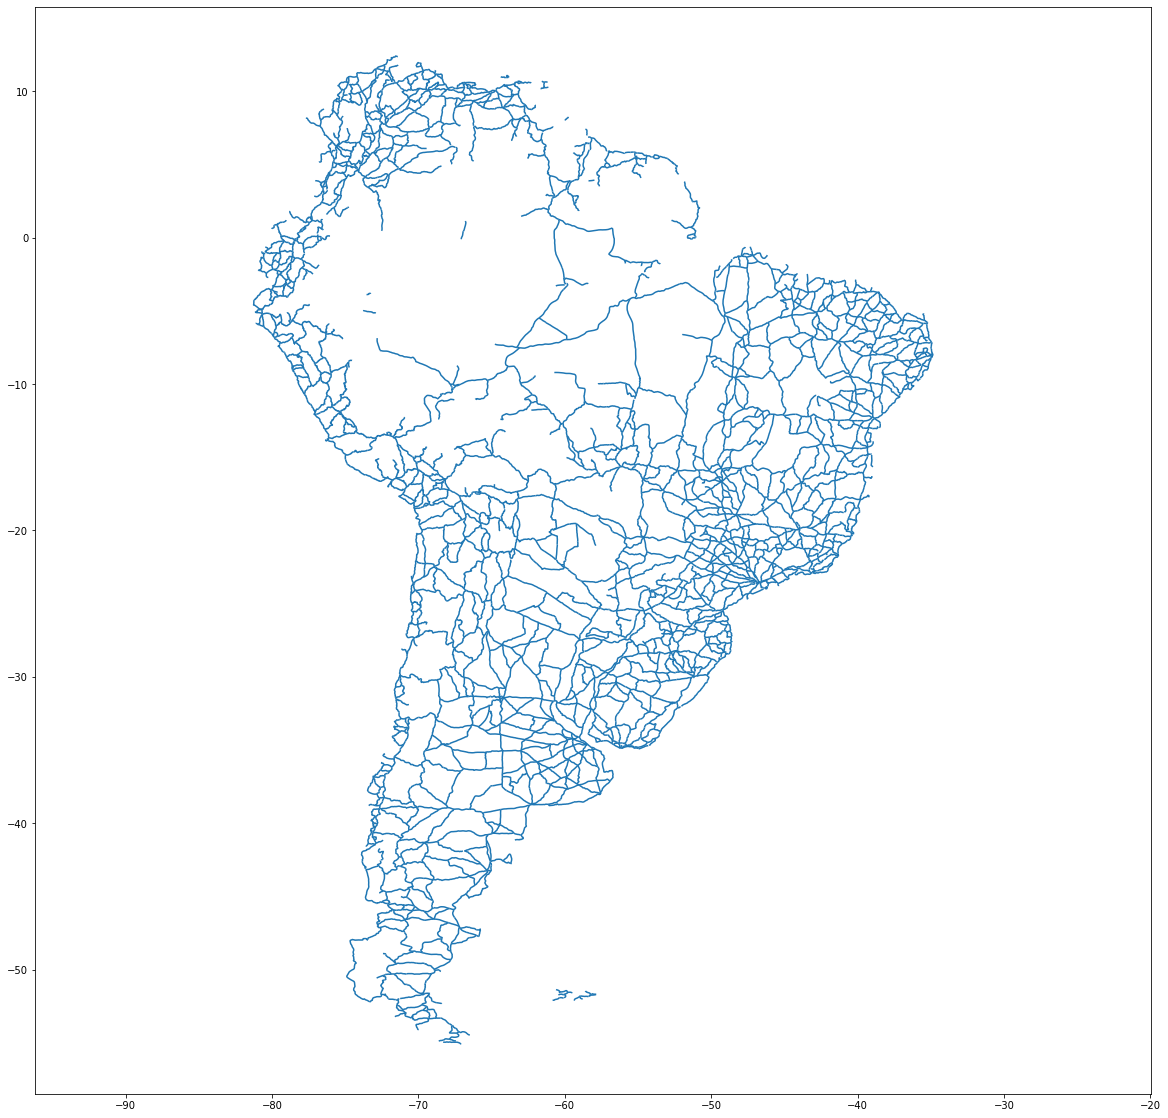

In [6]:
usa = gpd.read_file('ne_10m_roads/ne_10m_roads.shp')
type(usa)
fig, ax = plt.subplots(figsize  = (20, 20))
us_roads_only = usa.loc[usa['continent'] == 'South America']
#usa['sov_a3'].value_counts()
us_roads_only.plot(ax = ax)
plt.axis('equal');

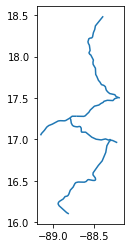

In [7]:
us_roads_only = usa.loc[usa['sov_a3'] == 'BLZ']
us_roads_only.plot()

In [8]:
usa2 = gpd.read_file('ne_10m_roads_north_america/ne_10m_roads_north_america.shp')
type(usa2)
usa2

prefix number    class         type    divided        country  \
0       None   None    Other      Unpaved       None  United States   
1       None   None    Other  Other Paved       None  United States   
2       None     S2    Other  Other Paved       None         Mexico   
3       None     S1    Other  Other Paved       None  United States   
4       None     S1    Other    Secondary  Undivided  United States   
...      ...    ...      ...          ...        ...            ...   
49178   None      2  Federal      Freeway    Divided         Canada   
49179     US     77  Federal      Freeway    Divided  United States   
49180   None      2  Federal      Primary  Undivided         Mexico   
49181   None    40D  Federal      Tollway    Divided         Mexico   
49182   None    45D  Federal      Tollway    Divided         Mexico   

               state  note  scalerank  uident      length  rank  \
0         California  None         12       0   10.373500     0   
1             Nevada  None         12       1    2.307760     0   
2               None  None         11       2   92.178100    -1   
3         California  None         11       3   46.124100     0   
4         California  None         10       4    0.305463     0   
...              ...   ...        ...     ...         ...   ...   
49178  New Brunswick  None          4   26928  748.888000     2   
49179          Texas  None          3   30345   60.278200     2   
49180     Tamaulipas  None          3   21659  287.519000     2   
49181     Nuevo Leon  None          4    2191   74.353800     2   
49182        Jalisco  None          3   47093   90.023500     2   

           continent                                           geometry  
0      North America  LINESTRING (-119.63954 37.85634, -119.63954 37...  
1      North America  LINESTRING (-119.76779 39.14514, -119.74707 39...  
2      North America  LINESTRING (-116.47485 33.09658, -116.46246 33...  
3      North America  LINESTRING (-116.56070 33.01205, -116.55359 33...  
4      North America  LINESTRING (-116.50827 32.81225, -116.50820 32...  
...              ...                                                ...  
49178  North America  LINESTRING (-68.46150 47.47324, -68.45692 47.4...  
49179  North America  LINESTRING (-97.78083 26.32240, -97.78051 26.3...  
49180  North America  LINESTRING (-98.36405 26.15211, -98.35856 26.1...  
49181  North America  LINESTRING (-100.06928 25.65456, -100.06924 25...  
49182  North America  LINESTRING (-101.79234 21.11220, -101.79239 21...  

[49183 rows x 14 columns]

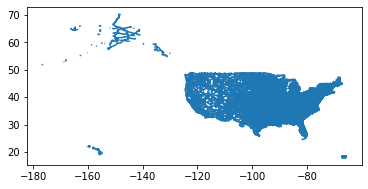

In [9]:
country_boundary_us = usa2.loc[usa2['country'] == 'United States']
country_boundary_us.plot()

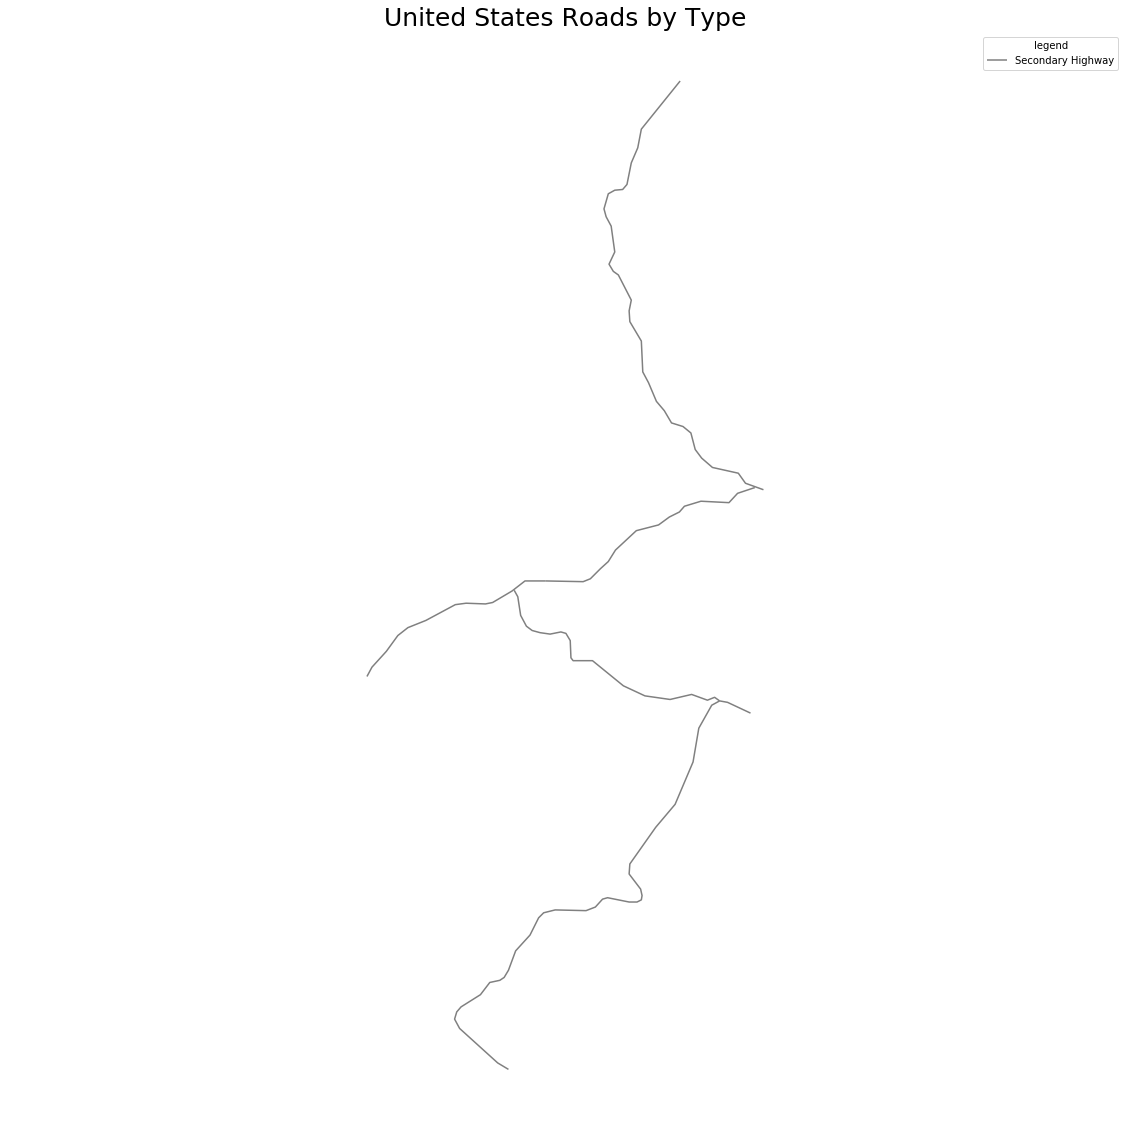

In [10]:
# make it a bit nicer using a dictionary to assign colors and line widths
road_attrs = {'Beltway': ['black',2], 
               'Secondary Highway': ['grey',.5],
               'Road': ['grey',.5],
               'Bypass': ['grey', .5], 
               'Ferry Route': ['grey', .5], 
               'Major Highway': ['black', 1]}

# plot the data
fig, ax = plt.subplots(figsize  = (20, 20))

for ctype, data in us_roads_only.groupby('type'):
    data.plot(color=road_attrs[ctype][0], 
              label = ctype,
              ax = ax, 
              #linewidth=road_attrs[ctype][1]
             )

#country_boundary_us.plot(alpha = 1, color="white", edgecolor = "black", ax = ax)
ax.legend(title="legend")
ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()
plt.axis('equal');

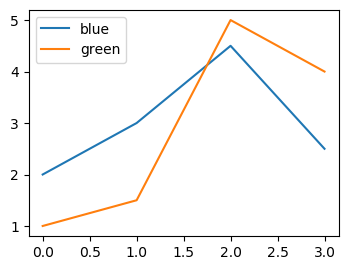

In [11]:
import matplotlib.pyplot as plt
w = 4
h = 3
d = 100
plt.figure(figsize=(w, h), dpi=d)

y1 = [2, 3, 4.5, 2.5]
plt.plot(y1)
y2 = [1, 1.5, 5, 4]
plt.plot(y2)
plt.legend(["blue", "green"])
plt.savefig("out.png")

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()


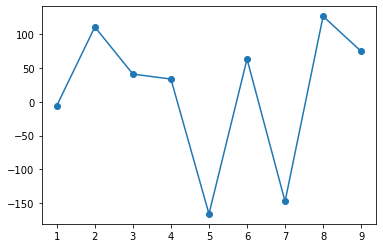

In [12]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
# data
df=pd.DataFrame({'x': range(1,10), 'y': np.random.randn(9)*80+range(1,10) })
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='-', marker='o')
plt.show()


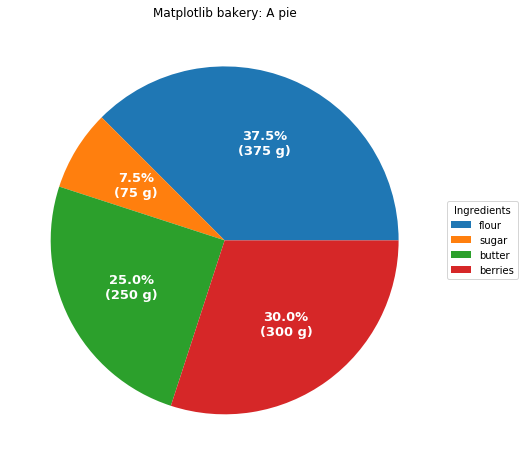

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.8, 1))

plt.setp(autotexts, size=13, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()